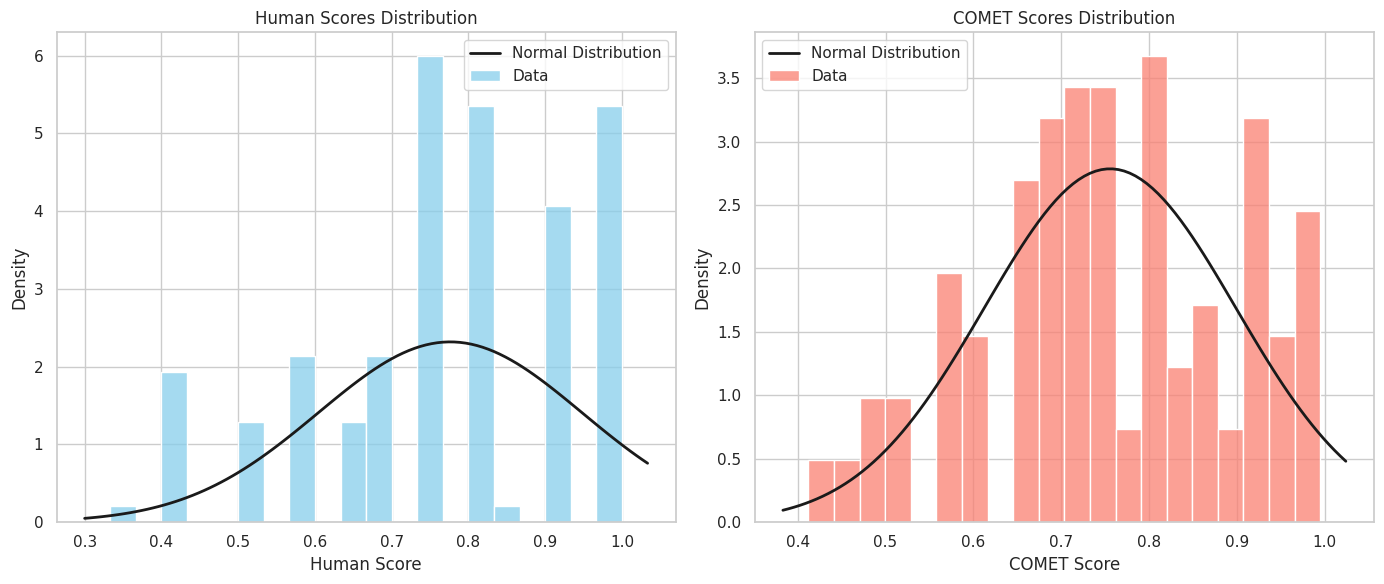

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load Excel file
file_path = "/content/drive/MyDrive/Colab Notebooks/Final_Poster_Machine_Translation/Rating Translation 140 sentences/ACC-FLUENCY/normalized_scores.xlsx"
df = pd.read_excel(file_path)

# Set style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(14, 6))

# Plot Human Scores with normal curve
plt.subplot(1, 2, 1)
mean_human = df['Average_normalized'].mean()
std_human = df['Average_normalized'].std()
sns.histplot(df['Average_normalized'], bins=20, kde=False, stat="density", color='skyblue', label="Data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_human, std_human)
plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution")
plt.title('Human Scores Distribution')
plt.xlabel('Human Score')
plt.ylabel('Density')
plt.legend()

# Plot COMET Scores with normal curve
plt.subplot(1, 2, 2)
mean_comet = df['comet_score'].mean()
std_comet = df['comet_score'].std()
sns.histplot(df['comet_score'], bins=20, kde=False, stat="density", color='salmon', label="Data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_comet, std_comet)
plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution")
plt.title('COMET Scores Distribution')
plt.xlabel('COMET Score')
plt.ylabel('Density')
plt.legend()

# Display plots
plt.tight_layout()
plt.show()


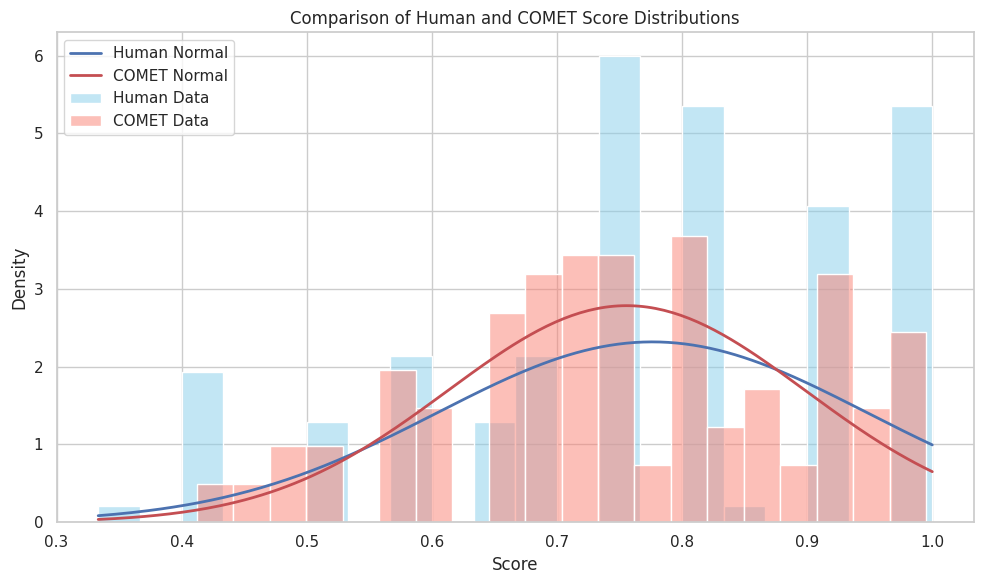

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load Excel file
file_path = "/content/drive/MyDrive/Colab Notebooks/Final_Poster_Machine_Translation/Rating Translation 140 sentences/ACC-FLUENCY/normalized_scores.xlsx"
df = pd.read_excel(file_path)

# Set style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(10, 6))

# Human data
mean_human = df['Average_normalized'].mean()
std_human = df['Average_normalized'].std()
sns.histplot(df['Average_normalized'], bins=20, kde=False, stat="density", color='skyblue', label="Human Data", alpha=0.5)

x = np.linspace(min(df['Average_normalized'].min(), df['comet_score'].min()),
                max(df['Average_normalized'].max(), df['comet_score'].max()), 200)
p_human = norm.pdf(x, mean_human, std_human)
plt.plot(x, p_human, 'b', linewidth=2, label="Human Normal")

# COMET data
mean_comet = df['comet_score'].mean()
std_comet = df['comet_score'].std()
sns.histplot(df['comet_score'], bins=20, kde=False, stat="density", color='salmon', label="COMET Data", alpha=0.5)

p_comet = norm.pdf(x, mean_comet, std_comet)
plt.plot(x, p_comet, 'r', linewidth=2, label="COMET Normal")

# Labels and title
plt.title('Comparison of Human and COMET Score Distributions')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import shapiro, kstest, normaltest
import matplotlib.pyplot as plt

# Load data
file_path = "/content/drive/MyDrive/Colab Notebooks/Final_Poster_Machine_Translation/Rating Translation 140 sentences/ACC-FLUENCY/normalized_scores.xlsx"
df = pd.read_excel(file_path)

# Extract scores
human_scores = df['Average_normalized'].dropna()
comet_scores = df['comet_score'].dropna()

# Shapiro-Wilk Test
shapiro_human = shapiro(human_scores)
shapiro_comet = shapiro(comet_scores)

# Kolmogorov-Smirnov Test (against normal with same mean & std)
kstest_human = kstest(human_scores, 'norm', args=(human_scores.mean(), human_scores.std()))
kstest_comet = kstest(comet_scores, 'norm', args=(comet_scores.mean(), comet_scores.std()))

# D’Agostino and Pearson’s Test
normaltest_human = normaltest(human_scores)
normaltest_comet = normaltest(comet_scores)

# Print results
print("=== Shapiro-Wilk Test ===")
print(f"Human: stat={shapiro_human.statistic:.4f}, p-value={shapiro_human.pvalue:.4f}")
print(f"COMET: stat={shapiro_comet.statistic:.4f}, p-value={shapiro_comet.pvalue:.4f}")

print("\n=== Kolmogorov-Smirnov Test ===")
print(f"Human: stat={kstest_human.statistic:.4f}, p-value={kstest_human.pvalue:.4f}")
print(f"COMET: stat={kstest_comet.statistic:.4f}, p-value={kstest_comet.pvalue:.4f}")

print("\n=== D’Agostino and Pearson’s Test ===")
print(f"Human: stat={normaltest_human.statistic:.4f}, p-value={normaltest_human.pvalue:.4f}")
print(f"COMET: stat={normaltest_comet.statistic:.4f}, p-value={normaltest_comet.pvalue:.4f}")


=== Shapiro-Wilk Test ===
Human: stat=0.9266, p-value=0.0000
COMET: stat=0.9737, p-value=0.0084

=== Kolmogorov-Smirnov Test ===
Human: stat=0.1395, p-value=0.0077
COMET: stat=0.0780, p-value=0.3438

=== D’Agostino and Pearson’s Test ===
Human: stat=8.0769, p-value=0.0176
COMET: stat=3.8635, p-value=0.1449


In [15]:
import pandas as pd

# Example: Load your data
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Final_Poster_Machine_Translation/Rating Translation 140 sentences/ACC-FLUENCY/normalized_scores.xlsx")  # Make sure this has 'comet' and 'human' columns

# Calculate the difference
df["diff"] = df["Average_normalized"] - df["comet_score"]


In [16]:
print(df["diff"])

0     -0.126223
1     -0.044042
2      0.014761
3      0.007510
4      0.129252
         ...   
135    0.184731
136   -0.065510
137   -0.152951
138    0.097041
139    0.008756
Name: diff, Length: 140, dtype: float64


In [17]:
# Set threshold
threshold = 0.2

# Classify the cases
df["comet_vs_human"] = df["diff"].apply(lambda x: "overestimation" if x < -threshold else
                                                  "underestimation" if x > threshold else
                                                  "equal")

# Count occurrences
counts = df["comet_vs_human"].value_counts()
print(counts)


comet_vs_human
equal              112
underestimation     16
overestimation      12
Name: count, dtype: int64


In [18]:
percentages = df["comet_vs_human"].value_counts(normalize=True) * 100
print(percentages.round(2))


comet_vs_human
equal              80.00
underestimation    11.43
overestimation      8.57
Name: proportion, dtype: float64


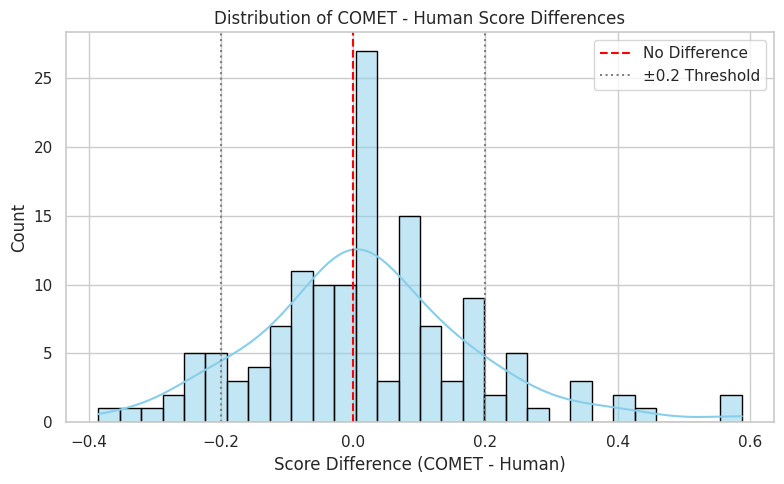

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot histogram with KDE (kernel density estimate)
plt.figure(figsize=(8, 5))
sns.histplot(df["diff"], bins=30, kde=True, color="skyblue", edgecolor="black")

# Add vertical line at 0 (no difference)
plt.axvline(x=0, color="red", linestyle="--", label="No Difference")

# Add threshold lines
threshold = 0.2
plt.axvline(x=-threshold, color="gray", linestyle="dotted", label="±0.2 Threshold")
plt.axvline(x=threshold, color="gray", linestyle="dotted")

# Labels and title
plt.title("Distribution of COMET - Human Score Differences")
plt.xlabel("Score Difference (COMET - Human)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()
